# 🚢 Titanic Survival Prediction

## 🧭 Project Overview
This notebook explores the Titanic dataset to uncover survival trends and predict outcomes using machine learning.

We'll go through data loading, cleaning, visualization, model building, and key insights.

In [11]:
# 📦 Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 📥 Data Loading
We'll load the dataset and inspect its structure.

In [12]:
# Load the Titanic dataset
df = pd.read_csv('../datasets/Titanic/train.csv')

# Quick look
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 🔍 Exploratory Data Analysis (EDA)
Let's visualize some key distributions and correlations.

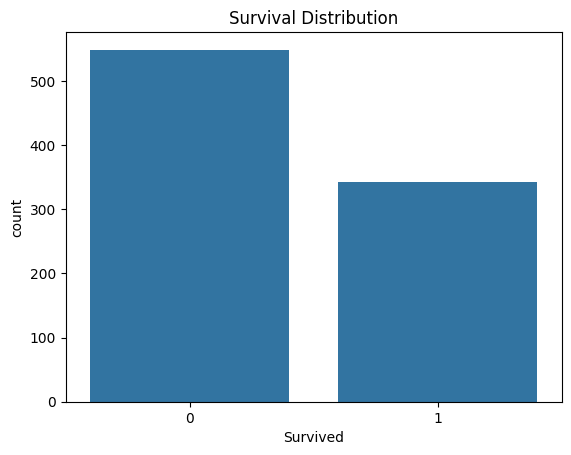

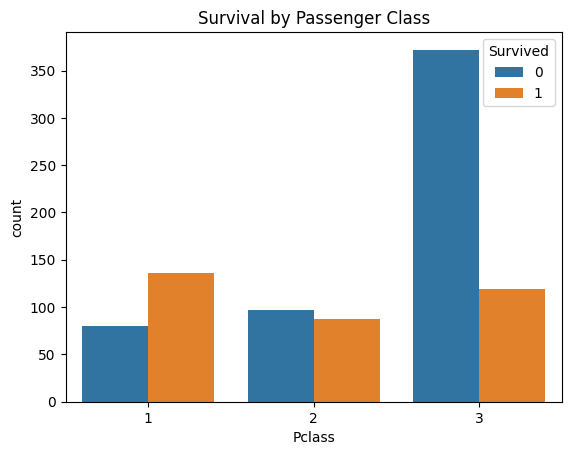

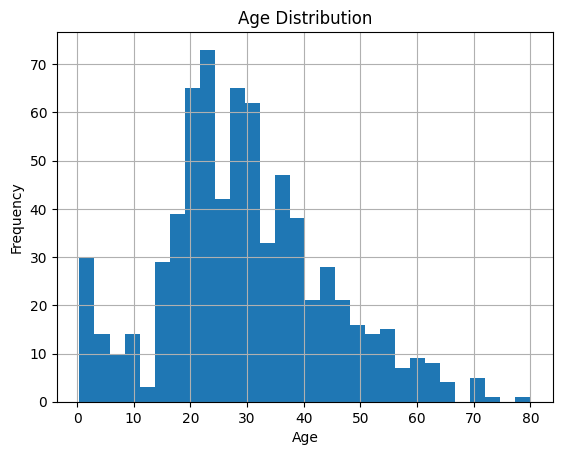

In [13]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution")
plt.show()

# Passenger class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# Age histogram
df['Age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## 🧹 Data Preprocessing
We’ll clean missing values, encode categorical variables, and engineer new features.

In [14]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# Encode Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch']

C:\Users\deval\AppData\Local\Temp\ipykernel_4304\3978657142.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\deval\AppData\Local\Temp\ipykernel_4304\3978657142.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

## 🤖 Model Building
We'll use logistic regression to predict survival, followed by evaluation.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']
X = df[features]
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

## 📊 Model Evaluation
We’ll check accuracy, confusion matrix, and other metrics.

Accuracy: 0.8097014925373134


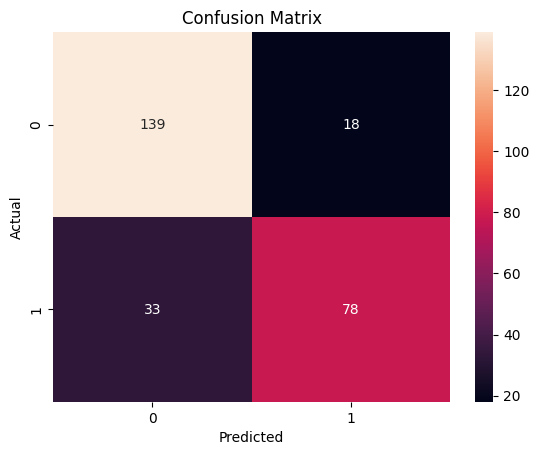

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.81      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [16]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

## 💡 Insights
- First-class passengers and women had a higher survival rate.
- Age and family size showed moderate influence on outcome.
- Logistic regression performed well as a baseline model.

## 📝 Conclusion
This Titanic analysis highlighted important features influencing survival and demonstrated the power of logistic regression for classification.

Next steps could involve experimenting with ensemble methods, tuning hyperparameters, or cross-validation for improved accuracy.